In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [100]:
df = pd.read_csv('2- Countries-Clustering.csv')
df.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [101]:
df.shape

(241, 4)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       241 non-null    object 
 1   Longitude  241 non-null    float64
 2   Latitude   241 non-null    float64
 3   continent  241 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.7+ KB


In [103]:
df.isnull().sum()

name         0
Longitude    0
Latitude     0
continent    0
dtype: int64

In [104]:
df['continent'].value_counts()

continent
Africa                     54
Asia                       53
Europe                     50
North America              38
Oceania                    24
South America              13
Seven seas (open ocean)     8
Antarctica                  1
Name: count, dtype: int64

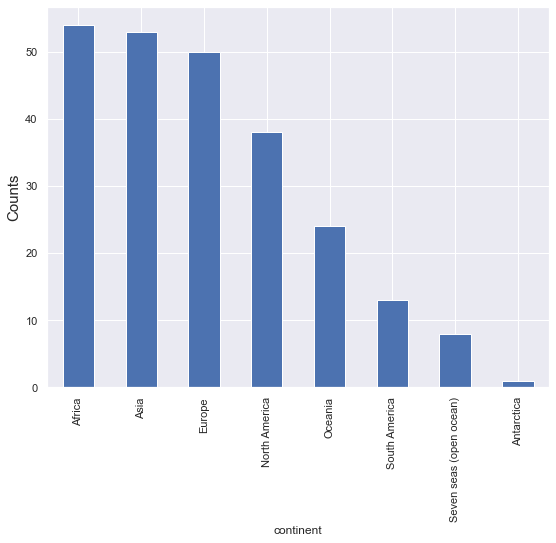

In [105]:
df['continent'].value_counts().plot(kind = 'bar', figsize = (9, 7))
plt.ylabel('Counts', fontsize = 15)
plt.show()

In [106]:
df.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


In [107]:
df.duplicated().sum()

0

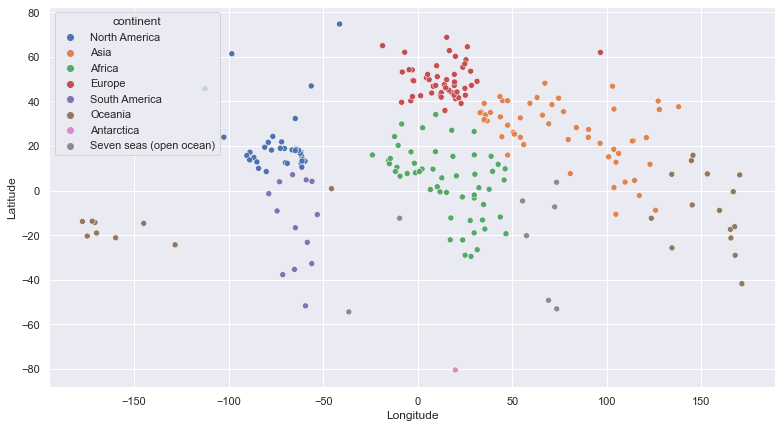

In [108]:
plt.figure(figsize = (13, 7))
sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'continent')
plt.show()

In [109]:
for i in df['continent'].unique():
    print(i)
    print(df[df['continent'] == i].describe())
    print('----------------------------------------------')

North America
        Longitude   Latitude
count   38.000000  38.000000
mean   -72.317372  21.109934
std     14.395115  13.838243
min   -112.461674   8.517508
25%    -80.713888  13.778277
50%    -67.722135  17.926905
75%    -62.310777  19.305480
max    -41.341911  74.710513
----------------------------------------------
Asia
        Longitude   Latitude
count   53.000000  53.000000
mean    77.390370  26.310207
std     31.963041  13.805306
min     33.006002 -10.647851
25%     47.586762  20.605153
50%     74.541655  29.334313
75%    104.851898  36.385240
max    138.030896  48.156881
----------------------------------------------
Africa
       Longitude   Latitude
count  54.000000  54.000000
mean   15.843304   3.982106
std    19.463544  15.605179
min   -23.959888 -29.580032
25%    -0.671992  -3.238913
50%    17.773015   7.468603
75%    30.171042  14.137094
max    46.704737  34.119562
----------------------------------------------
Europe
       Longitude   Latitude
count  50.000000  50.000

In [110]:
df.describe()['Longitude'][1]

14.215379955228213

In [111]:
con1, long_min, long_max, long_mean = [], [], [], []
lat_min, lat_max, lat_mean = [], [], []
for i in df['continent'].unique():
    long_min.append(df[df['continent'] == i].describe()['Longitude'][3])
    long_max.append(df[df['continent'] == i].describe()['Longitude'][7])
    long_mean.append(df[df['continent'] == i].describe()['Longitude'][1])
    lat_min.append(df[df['continent'] == i].describe()['Latitude'][3])
    lat_max.append(df[df['continent'] == i].describe()['Latitude'][7])
    lat_mean.append(df[df['continent'] == i].describe()['Latitude'][1])
    con1.append(i)

In [112]:
b1 = pd.DataFrame(data = con1, columns = ['continent'])
b1['min_longitude'] = long_mean
b1['max_longitude'] = long_max
b1['mean_longitude'] = long_mean
b1['min_latitude'] = lat_min
b1['max_latitude'] = lat_max
b1['mean_latitude'] = lat_mean
b1

,continent,min_longitude,max_longitude,mean_longitude,min_latitude,max_latitude,mean_latitude
0,North America,-72.317372,-41.341911,-72.317372,8.517508,74.710513,21.109934
1,Asia,77.390370,138.030896,77.390370,-10.647851,48.156881,26.310207
2,Africa,15.843304,46.704737,15.843304,-29.580032,34.119562,3.982106
3,Europe,14.071218,96.686561,14.071218,35.921496,68.750156,49.463130
4,South America,-64.262153,-53.097831,-64.262153,-51.744840,7.124224,-15.307293
5,Oceania,40.539529,171.484924,40.539529,-41.811136,15.829276,-11.239179
6,Antarctica,19.921090,19.921090,19.921090,-80.508579,-80.508579,-80.508579
7,Seven seas (open ocean),44.464498,73.520517,44.464498,-54.464882,3.728709,-24.718151


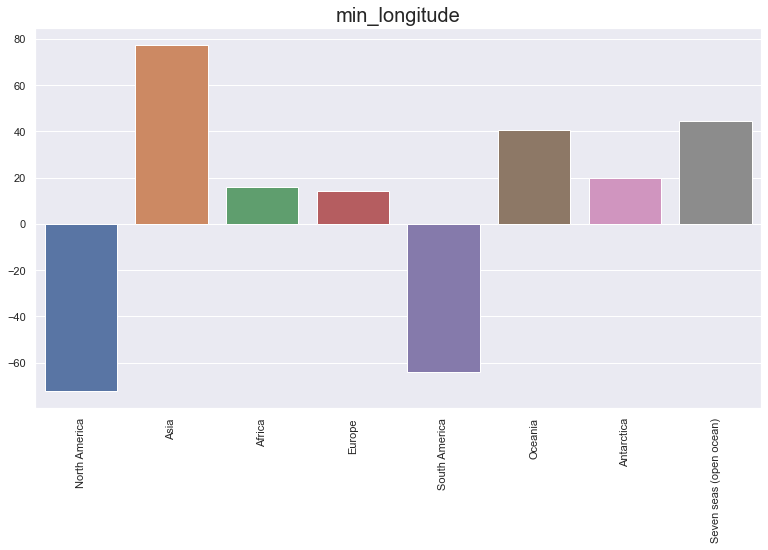

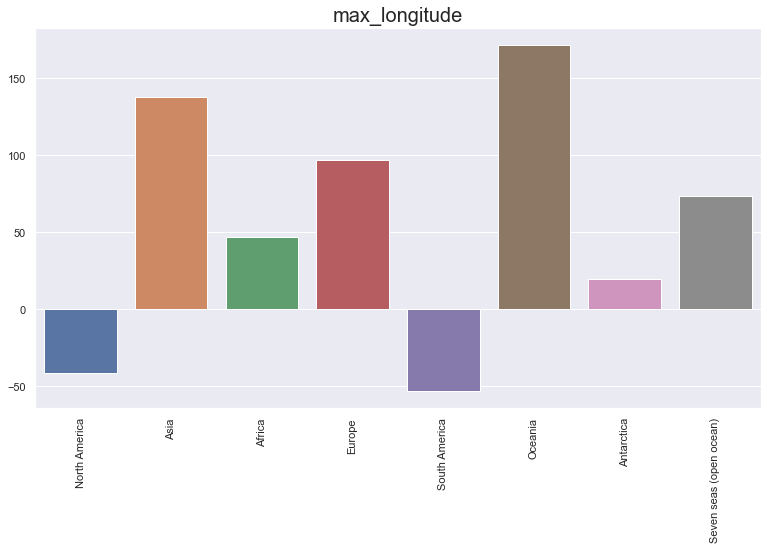

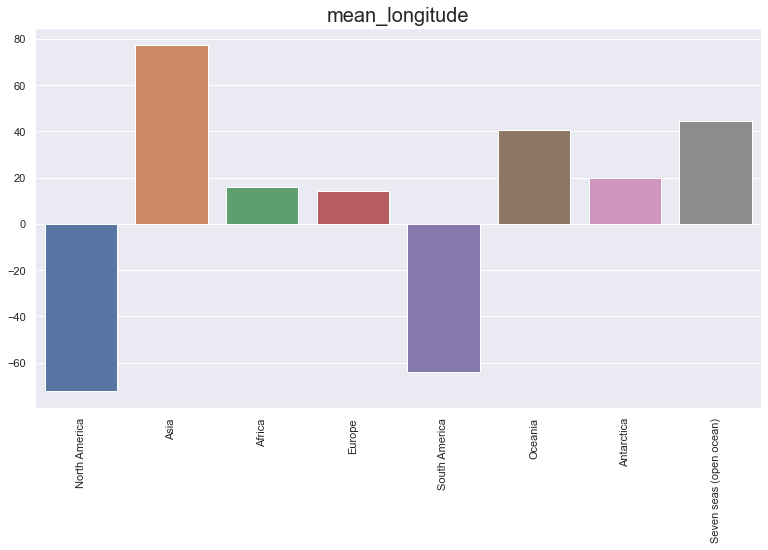

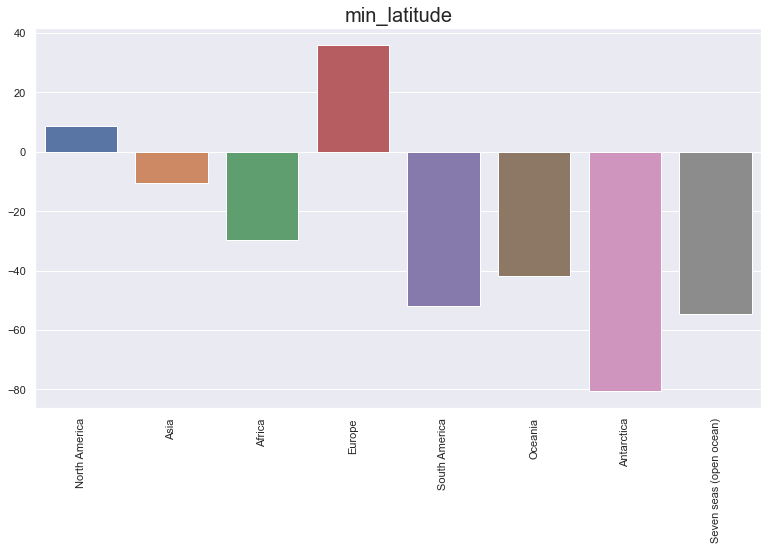

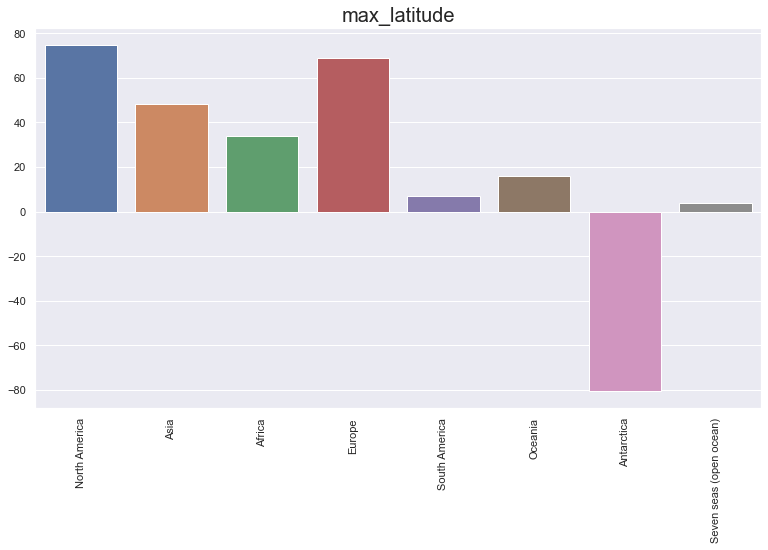

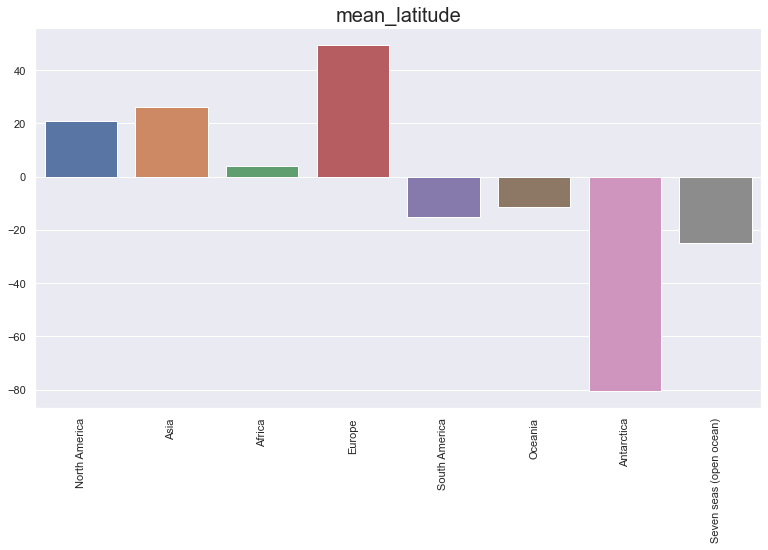

In [113]:
for i in range(1, len(b1.columns)):
    plt.figure(figsize = (13, 7))
    sns.barplot(data = b1, x = b1.iloc[:, 0].values, y = b1.iloc[:, i].values)
    plt.title(b1.columns[i], fontsize = 20)
    plt.xticks(rotation = 90)
    plt.show()

In [114]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df[['Longitude', 'Latitude']])

In [115]:
x_scaled[:10]

array([[-1.17162903, -0.17542247],
       [ 0.72065689,  0.62892708],
       [ 0.04622597, -1.11184903],
       [-1.07536833,  0.03979728],
       [ 0.08118733,  0.90468301],
       [ 0.07984388,  1.62442844],
       [-0.17609401,  0.95750947],
       [ 0.55778603,  0.25419598],
       [-1.10479634, -1.98313118],
       [ 0.42739777,  0.87249581]])

In [116]:
inertia, s = [], []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
    s.append(silhouette_score(x_scaled, kmeans.labels_))

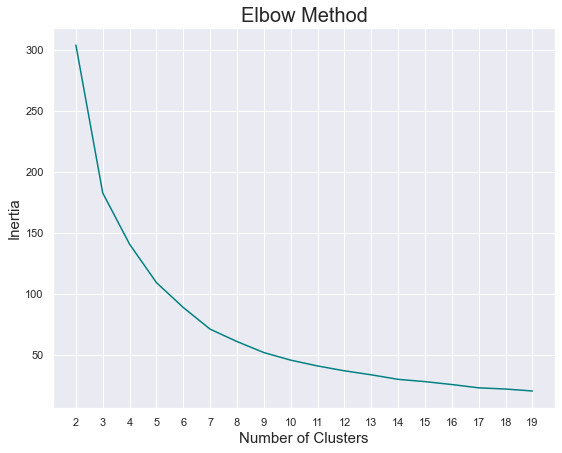

In [117]:
plt.figure(figsize = (9, 7))
plt.plot(range(2, 20), inertia, color = 'teal')
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('Inertia', fontsize = 15)
plt.xticks(range(2, 20))
plt.show()

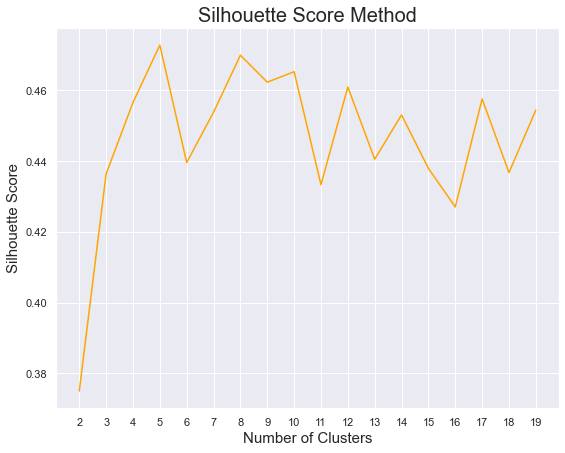

In [118]:
plt.figure(figsize = (9, 7))
plt.plot(range(2, 20), s, color = 'orange')
plt.title('Silhouette Score Method', fontsize = 20)
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('Silhouette Score', fontsize = 15)
plt.xticks(range(2, 20))
plt.show()

In [119]:
model = KMeans(n_clusters = 8, init = 'k-means++', n_init = 10)
model.fit(x_scaled)

KMeans(n_init=10)

In [120]:
data = df.copy()

In [121]:
y = model.labels_

In [122]:
data['Cluster'] = y

In [123]:
data

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,North America,1
1,Afghanistan,66.004734,33.835231,Asia,3
2,Angola,17.537368,-12.293361,Africa,0
3,Anguilla,-63.064989,18.223959,North America,1
4,Albania,20.049834,41.142450,Europe,2
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,4
237,Yemen,47.586762,15.909280,Asia,7
238,South Africa,25.083901,-29.000341,Africa,0
239,Zambia,27.774759,-13.458242,Africa,0


In [125]:
data['Cluster'].value_counts()

Cluster
2    66
1    43
7    41
3    34
6    22
0    19
5     8
4     8
Name: count, dtype: int64

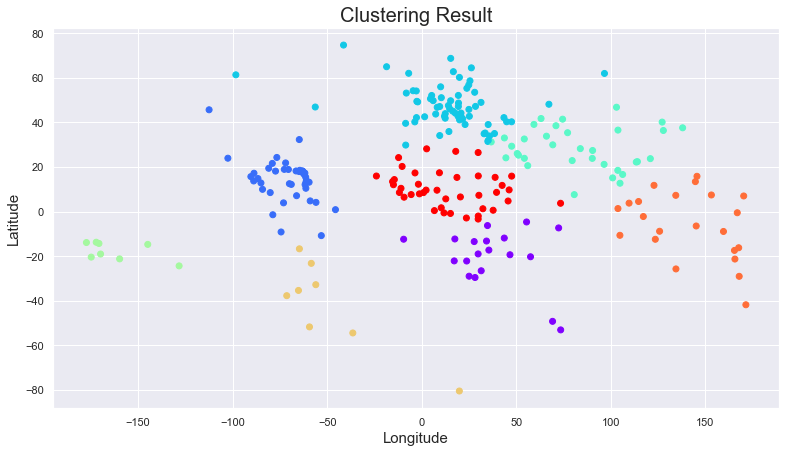

In [128]:
plt.figure(figsize = (13, 7))
plt.scatter(data['Longitude'], data['Latitude'], c = data['Cluster'], cmap = 'rainbow')
plt.title('Clustering Result', fontsize = 20)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)
plt.show()

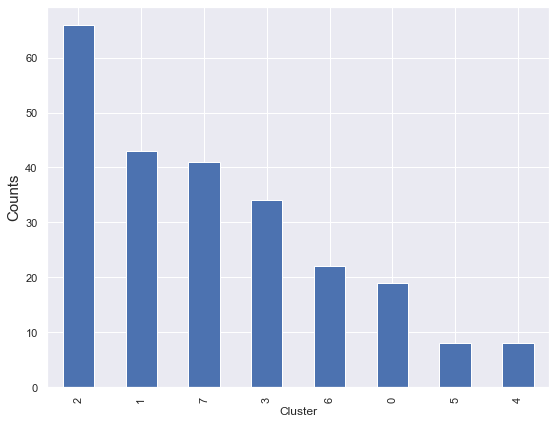

In [129]:
data['Cluster'].value_counts().plot(kind = 'bar', figsize = (9, 7))
plt.ylabel('Counts', fontsize = 15)
plt.show()